<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# Introducción a la sintaxis de Python III: funciones

_En esta clase continuaremos con nuestra introducción a Python.
Lo más importante para programar, y no solo en Python, es saber organizar el código en piezas más pequeñas que hagan tareas independientes y combinarlas entre sí. Las **funciones** son el primer nivel de organización del código: reciben unas *entradas*, las *procesan* y devuelven unas *salidas*._

![Black box](../images/blackbox.jpg)

**Objetivos**:

* Entender la sintaxis básica de la definición de funciones que reciban y devuelvan parámetros.
* Conocer la manera de documentar funciones.
* Fijar valores por defecto.
* Entender el *scope* en la ejecución de funciones. 
---

###### El contenido de esta clase usa material de: http://swcarpentry.github.io/python-novice-inflammation/ distribuido bajo licencia [Creative Commons Attribution license](https://software-carpentry.org/license/)


## Definiendo una función

Comencemos por definir una función sencilla, que pase de grados fahrenheit a kelvin. Recordemos que: 

$$T(K) = (T(°F) - 32) \cdot 5/9 + 273.15$$

In [1]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

Vemos que la función se define comenzando con la palabra clave `def` seguido del `nombre_de_la_funcion` y a continuación, entre paréntesis, los argumentos de entrada. La cabercera de la función termina con dos puntos, `:`.

Le sigue el cuerpo de la función, indentado con cuatro espacios y finaliza con un `return` y los argumentos de salida. Si una función no devuelve nada, no hace falta usar un `return` (ni aunque esté vacío). La definición de la función termina cuando la indentación vuelve a su nivel inicial.

Probemos la función:

In [2]:
# Punto de congelación del agua 32 F
print('freezing point of water:', fahr_to_kelvin(32))
# Punto de ebullición del agua 212 F
print('boiling point of water:', fahr_to_kelvin(212))

freezing point of water: 273.15
boiling point of water: 373.15


## Funciones que llaman a otras funciones

Podemos definir funciones que llamen a otras con tal de que estén creadas en el momento de llamarlas. Definamos una función para pasar de Kelvin a Celsius:

In [3]:
def kelvin_to_celsius(temp):
    return temp - 273.15

In [4]:
print('absolute zero in Celsius:', kelvin_to_celsius(0.0))

absolute zero in Celsius: -273.15


Si ahora queremos convertir de Farenheit a Celsius, podemos usar la función que ya teníamos definida:

In [5]:
def fahr_to_celsius(temp):
    temp_k = fahr_to_kelvin(temp)
    result = kelvin_to_celsius(temp_k)
    return result

print('freezing point of water in Celsius:', fahr_to_celsius(32.0))

freezing point of water in Celsius: 0.0


Podemos empezar a ver como, utilizando funciones, podemos construir programas grandes y complejos a partir de pequeñas piezas autónomas, reutilizables y fácilmente testeables.

## Scope 

Es importante resltar que las variables que se crean dentro de las funciones no son accesibles una vez que termina la ejecución de la función. En cambio, la función si que puede acceder a cosas que se han definido fuera de ella. No obstantes, esto último no constituye una buena práctica de cara la reproducibilidad, mantenibilidad y testeo de la función. 

Creemos una función `span` que devuelva el rango de variación de los datos en un array:

In [6]:
# importemos numpy
import numpy as np

In [7]:
# Definamos la función
def span(a):
    diff = a.max() - a.min()
    return diff

In [8]:
# carguemos los datos
data = np.loadtxt(fname='../data/swc/inflammation-01.csv', delimiter=',')

In [9]:
# calculemos el rango
span(data)

20.0

Date cuenta de que dentro de la función se creó una variable `diff` que no es accesible desde fuera:

In [10]:
diff

NameError: name 'diff' is not defined

Esto quiere decir que podríamos definir una variable que se llamase `diff` fuera de la función sin que colisionase:

In [11]:
diff = span(data)
diff

20.0

### Unbound local error

In [12]:
# preserve

x = 1

def add_one():
    print('x before: ', x)
#     x = x + 1
    print('x after: ', x + 1)
    
add_one()

x before:  1
x after:  2


http://eli.thegreenplace.net/2011/05/15/understanding-unboundlocalerror-in-python

## Documentando las funciones

La documentación de una función se almacena en el llamado `docstring`. Esta cadena de documentación va justo despueś de la cabecera y se define entre comillas triples.

Definamos una función que centre los datos en torno a un valor que se pase por cabecera:

In [13]:
def center(data, desired):
    """Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]"""
    return (data - data.mean()) + desired

In [14]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



Es una buena práctica, no solo documentar las funciones, sino hacerlo con un estilo único y estandarizado. Una referencia respaldada en el ecosistema científico es el estilo de documentación de NumPy: https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt

##### Ejercicio 

* Crear una función que reciba un fichero como `inflammation-01.csv` por cabecera y calcule la media, el máximo y el mínimo de la inflamación, así como pinte la media de la inflamación diaria para los pacientes.

In [15]:
import matplotlib.pyplot as plt

In [16]:
def analyze(file):
    data = np.loadtxt(file, delimiter=',')

    plt.plot(data.mean(axis=1))
    plt.show()
    
    return data.max(), data.mean(), data.min()

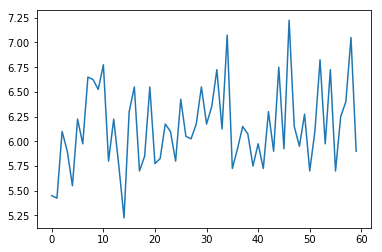

(20.0, 6.14875, 0.0)

In [17]:
analyze("../data/swc/inflammation-01.csv")

## Valores por defecto

Las funciones pueden definirse con valores por defecto para algunos de sus argumentos, de modo que podamos llamarlas sin especificar el valor de esos argumentos cada vez. Podemos ver un ejemplo en la función `np.loadtxt`

In [18]:
np.loadtxt('../data/swc/inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

Definamos la función `center` con valores por defecto:

In [19]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value (0 by default).
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

Ahora, el valor en torno al cual centrar es por defecto el cero cuando no se especifique lo contrario

In [20]:
# Array de ceros para probar
test_data = np.zeros((2, 2))

In [21]:
# Sin especificar desired
center(test_data)

array([[0., 0.],
       [0., 0.]])

In [22]:
# Especificando el argumento con su nombre
center(test_data, desired=0)

array([[0., 0.],
       [0., 0.]])

In [23]:
# Especificando el argumento en su posición
center(test_data, 0)

array([[0., 0.],
       [0., 0.]])

Veamos otro ejemplo sencillo:

In [24]:
# preserve
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

In [25]:
display()

a: 1 b: 2 c: 3


In [26]:
display(10)

a: 10 b: 2 c: 3


In [27]:
display(10, 20, 30)

a: 10 b: 20 c: 30


In [28]:
display(b=50)

a: 1 b: 50 c: 3


In [29]:
display(a=10, 20)

SyntaxError: positional argument follows keyword argument (<ipython-input-29-3df0c4a605ab>, line 1)

---
** En definitiva**:
* Hemos visto cómo se define una función con la palabra clave `def`, el nombre de la función y sus argumentos.
* El cuerpo de la función debe estar indentado
* Los argumentos se devuelven con la palabra clave `return`
* Hemos visto como funciona el stack de la función
* Hemos aprendido a definir nuestra propia documentación
* Hemos aprendido a especificar valores por defecto


---
**Referencias**

* Libro "Learn Python the Hard Way" http://learnpythonthehardway.org/book/
* Python Tutor, para visualizar código Python paso a paso http://pythontutor.com/
* Libro "How To Think Like a Computer Scientist" http://interactivepython.org/runestone/static/thinkcspy/toc.html
* Project Euler: ejercicios para aprender Python https://projecteuler.net/problems
* Python Challenge (!) http://www.pythonchallenge.com/

###### El contenido de esta clase usa material de: http://swcarpentry.github.io/python-novice-inflammation/ distribuido bajo licencia [Creative Commons Attribution license](https://software-carpentry.org/license/)

###### Mabel Delgado, Alejandro Sáez

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [30]:
# preserve
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())